In [1]:
import pandas as pd

df_o = pd.read_csv('data_o_clean.csv')

In [2]:
print(df_o.shape)
df_o.head()

(138152, 20)


,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824


In [3]:
!pip install pandas_profiling

In [4]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_o, title="Pandas Profiling Report", explorative=True)

# profile

In [5]:
df_o = df_o.drop(['Unnamed: 0', 'artists', 'name', 'release_date'], axis=1)

In [6]:
df_o.shape

(138152, 16)

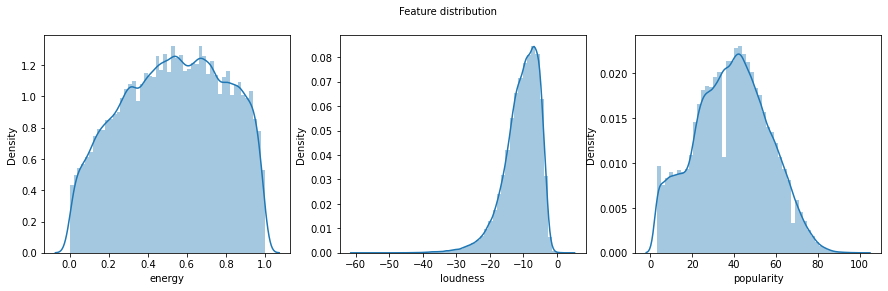

In [7]:
#visualisations
import seaborn as sns 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

features_o = ['energy','loudness','popularity']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(df_o['energy'])

plt.subplot(1, 3, 2)
sns.distplot(df_o['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(df_o['popularity'])


plt.suptitle('Feature distribution ', fontsize = 10)
plt.show()

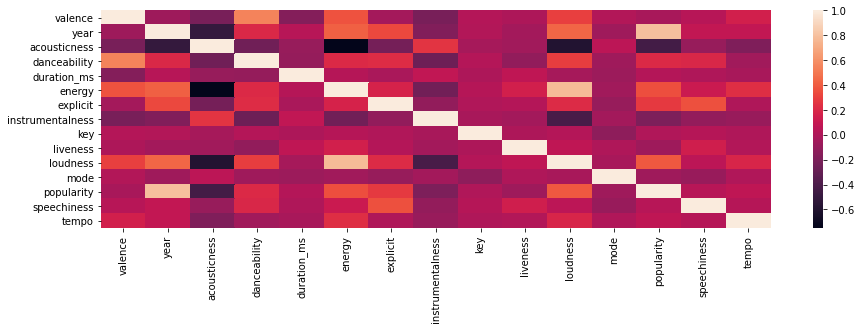

In [8]:
cor = df_o.corr()
sns.heatmap(cor)

# Building the model

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, \
    MaxAbsScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

import joblib

In [10]:
df_id = df_o['id']
df_features = df_o[df_o.columns.drop('id')]

In [11]:
scalable_features = ['duration_ms', 'popularity', 'tempo', 'key','loudness']
scaling_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
knn = NearestNeighbors(n_neighbors=10, algorithm= 'ball_tree', radius=1.0)



column_trans = ColumnTransformer(
    transformers=[
         ('scaled', scaling_transformer, scalable_features)],
         remainder='passthrough'
)

transformed_features = column_trans.fit_transform(df_features)
transformed_features[0]

array([1.51603365e-01, 1.03092784e-02, 3.32450402e-01, 9.09090909e-01,
       6.26004016e-01, 5.94000000e-02, 1.92100000e+03, 9.82000000e-01,
       2.79000000e-01, 2.11000000e-01, 0.00000000e+00, 8.78000000e-01,
       6.65000000e-01, 1.00000000e+00, 3.66000000e-02])

In [12]:
transformed_features.shape

(138152, 15)

In [13]:
df_o.isna().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
dtype: int64

In [14]:
knn.fit(transformed_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [15]:
neighbors = knn.kneighbors(transformed_features[39000].reshape(1,-1), 
                           return_distance=False)[0][1:]

In [16]:
neighbors

array([130546,  38922,  24787, 117968,  66001, 105347,  24716,  39028,
        79291])

In [17]:
for n in neighbors:
  print(df_id[n])

1fNsuaAQ3VhJy46HSh9PMY
7LtdGE1jTyh9mgnmxvkyRO
2Iq4mrFafAL99VjAnytVR0
0kKbwhBOhniM9Ndk5GPh8z
6HPyx5moK6NBsPOeQBlYO7
6rtdhEtXbkMVNjlSwn6aYD
4eJXH4tss0nwgHlaPqMwSc
1EfdsCcge41LcPtSpkZJ50
0SwncoSYwUKZXDZJanu35L


In [18]:
df = pd.read_csv('data_o_clean.csv')
df_new = df.query("id== '1fNsuaAQ3VhJy46HSh9PMY'")

df_new

,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
130546,163040,0.923,1982,0.566,['Kino'],0.5,176760,0.54,0,1fNsuaAQ3VhJy46HSh9PMY,0.0,10,0.0666,-9.13,0,Алюминиевые огурцы,36,1982-01-01,0.0437,140.03


In [19]:
returned_songs = [df.iloc[n] for n in neighbors]

In [20]:
returned_songs[0]

Unnamed: 0                          163040
valence                              0.923
year                                  1982
acousticness                         0.566
artists                           ['Kino']
danceability                           0.5
duration_ms                         176760
energy                                0.54
explicit                                 0
id                  1fNsuaAQ3VhJy46HSh9PMY
instrumentalness                         0
key                                     10
liveness                            0.0666
loudness                             -9.13
mode                                     0
name                    Алюминиевые огурцы
popularity                              36
release_date                    1982-01-01
speechiness                         0.0437
tempo                               140.03
Name: 130546, dtype: object

In [21]:
returned_songs[0]['name']

'Алюминиевые огурцы'

In [22]:
for song in returned_songs:
  print(song[15])

Алюминиевые огурцы
Se Me Fué
Cama Y Mesa
Chant No. 1 (I Don't Need This Pressure On) - 2010 Remaster
Sin Negro No Hay Guaguancó
I Love You
Triste Y Vacía
Sat In Your Lap
Vigilándote


In [23]:
df_pred = df.query("name== 'Uprising'")
df_pred

,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
15373,17458,0.411,2009,0.000202,['Muse'],0.602,304840,0.905,0,4VqPOruhp5EdPBeR92t6lQ,0.064000,2,0.117,-4.046,1,Uprising,76,2009-09-10,0.0775,128.019
111086,138913,0.428,2010,0.009910,['Sabaton'],0.527,295640,0.866,0,0cajnv3diwVnb2KXv7hLVs,0.000052,6,0.129,-3.763,0,Uprising,55,2010-05-21,0.0346,87.986


In [24]:
neighbors_uprising = knn.kneighbors(transformed_features[15373].reshape(1,-1), return_distance=False)[0][1:]

In [25]:
for n in neighbors_uprising:
  print(df_id[n])

1NhPKVLsHhFUHIOZ32QnS2
5RoIXwyTCdyUjpMMkk4uPd
58dRbjabfppvKsQlV0timz
2hUFjIbpKaRqs97OjUAmXb
6NUh68V6ikd96sTiUCH6ID
0vz64VTiPPBpcmla0QvAI9
0fZq7eIpfg7GHi9UOeRaaB
3lJwIAfeWtnNRbJXWbIHKD
7gecT24P3zqY4SXWjssq9B


In [26]:
returned_songs_uprising = [df.iloc[n] for n in neighbors_uprising]

In [27]:
for song in returned_songs_uprising:
  print(song[15], song[4])

Secrets ['OneRepublic']
Sweet Disposition ['The Temper Trap']
Beer In Mexico ['Kenny Chesney']
Johnny Boy ['Twenty One Pilots']
No Soy una Señora (Non Sono una Signora) ['María José']
Back Against the Wall ['Cage The Elephant']
Besos Mojados ['Wisin & Yandel']
A quien tú decidiste amar ['Sandoval']
The Party Freeze Song ['The Kiboomers']


# Save and serialize the model

In [28]:
joblib.dump(knn, 'knnbaseline.joblib.gz', compress=('gzip', 3))

['knnbaseline.joblib.gz']

In [29]:
model = joblib.load('knnbaseline.joblib.gz')

# Autoencoder and K-NN

In [30]:
import tensorflow as tf
import numpy as np
import os
%load_ext tensorboard
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [33]:
input_df = Input( shape = (15, ))

x = Dense(256, activation = 'relu')(input_df)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(8, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(8, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(256, activation = 'relu')(x)

decoded = Dense(15, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
autoencoder.fit(transformed_features, 
                transformed_features, 
                batch_size= 120, 
                epochs = 25, 
                verbose = 1) 

Epoch 1/25
1152/1152 [==============================] - 3s 3ms/step - loss: 1954.0455
Epoch 2/25
1152/1152 [==============================] - 3s 2ms/step - loss: 0.1835
Epoch 3/25
1152/1152 [==============================] - 3s 2ms/step - loss: 0.5469
Epoch 4/25
1152/1152 [==============================] - 3s 2ms/step - loss: 2.7997
Epoch 5/25
1152/1152 [==============================] - 3s 2ms/step - loss: 7.1918
Epoch 6/25
1152/1152 [==============================] - 3s 2ms/step - loss: 6.4738
Epoch 7/25
1152/1152 [==============================] - 3s 2ms/step - loss: 6.1152
Epoch 8/25
 698/1152 [=================>............] - ETA: 1s - loss: 12.3318

KeyboardInterrupt: ignored

In [ ]:
input_df = Input( shape = (15, ))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(256, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(15, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(256, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(128, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(64, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(15, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(transformed_features, 
                transformed_features, 
                batch_size= 120, 
                epochs = 25, 
                verbose = 1) 

In [ ]:
pred = autoencoder.predict(transformed_features)

In [ ]:
Knn_model = NearestNeighbors(n_neighbors=10)

In [ ]:
Knn_model.fit(pred)

In [ ]:
pred_song = autoencoder.predict(transformed_features[15373])

In [ ]:
pr